# Stima dello smorzamento e della forzante

Per adesso ci occuperemo solo di calcolare lo smorzamento.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from Mod.Fits import Fits

plt.style.use("Mod/mystyle.mplstyle")

## Calculate $k$ from static method

In [2]:
with open("Data/Misure k statiche pretensionata.csv", "r") as file:
    df = pd.read_csv(file, delimiter=";", decimal=",")


means = [df[f"Position (mm) Run #{i+1}"].mean() for i in range(3)]
# with error of 0.2mm

masse = [127.52, 147.2, 167.09][::-1]  # da excel

params, std_dev = Fits.linear(means, masse)

k_pretensionata = -params[0] * 9.805  # ? che valore usare per g?
std_err_p = std_dev[0] * 9.805  # p for pretensionata

print(f"k pretensionata: {k_pretensionata: 5.2f} ±{std_err_p: 5.2f}")

k pretensionata:  24.25 ± 0.14


### Repeat for non pretensionata

In [3]:
with open("Data/Misure k statiche non_pretensionata.csv", "r") as file:
    df = pd.read_csv(file, delimiter=";", decimal=",")

means = [df[f"Position (mm) Run #{i+1}"].mean() for i in range(3)]
# with error of 0.2mm

masse = [48.4, 67.95, 87.96]  # da excel

params, std_dev = Fits.linear(means, masse)

k_non_pretensionata = -params[0] * 9.805  # ? che valore usare per g?
std_err_np = std_dev[0] * 9.805  # np for non pretensionata

print(f"k non pretensionata: {k_non_pretensionata: 5.3f} ±{std_err_np: 5.3f}")

k non pretensionata:  3.226 ± 0.021


## Calcolo $\gamma$

I dataframe sono individuabili tramite:\
`pc`: oscillazioni molla pretensionata con il cd\
`pr`: oscillazioni molla pretensionata con la rete\
`nc`: oscillazioni molla non pretensionata con il cd\
`nr`: oscillazioni molla non pretensionata con la rete

[-19.8332248    0.06854244  12.9543509   -0.14882633   0.14075554]
[2.13561175e+01 5.59137640e-03 9.23329662e+00 1.40155160e-01] 12.96208532680409
[17.13620287  0.05725121 11.48779835 -2.77348746 -0.16462573]
[ 1.86028742e+01  5.52948224e-03  3.54702588e+00 -1.71014802e-01] 11.482871626135157


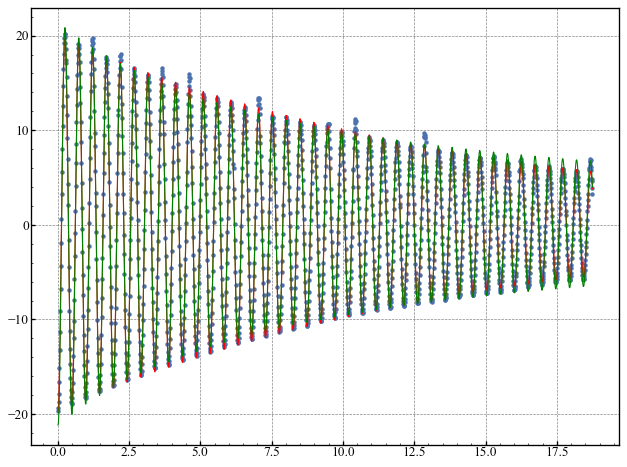

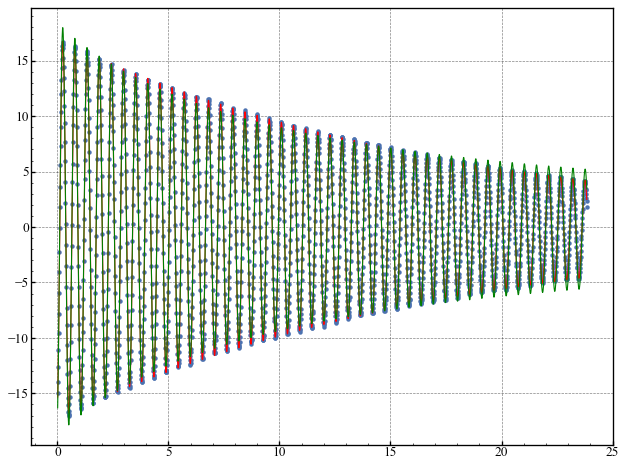

In [4]:
with open("Data/Oscillazioni pretensionata_cd_5e7masse.csv", "r") as file:
    df_pc = pd.read_csv(file, delimiter=";", decimal=",")

masse = [134.36, 173.94]  # Da excel

for i in range(2):
    fig, ax = plt.subplots()
    Y = df_pc.iloc[:, i].dropna()
    X = np.linspace(0.01, len(Y) / 100, len(Y))

    omega = np.sqrt(
        k_pretensionata
        / ((masse[i] + 29.91 / 3) / 1000)
        # 29.91/3 deriva dalla massa della molla
        # /1000 per convertire g in kg
    )
    scale_omega = 1

    params, std_dev = Fits.smorzato(X, Y)
    params2, std_dev2 = Fits.smorzato2(X, Y, omega * scale_omega)

    print(params)
    print(params2, omega * scale_omega)

    ax.scatter(X, Y)
    ax.plot(X, Fits.curve(X, *params), c="r")
    ax.plot(X, Fits.curve2(X, *params2, omega * scale_omega), c="g")

### CI SONO DELLE SBAVATURE

## Repeat for the other 3 cases

[17.7750401   0.07824555 13.17437779 -2.75527925 -0.03763684]
[ 1.93989407e+01  7.52248162e-03  3.54686208e+00 -4.52767465e-02] 13.171361324665357
[-22.49277308   0.06801902  11.63111402  -0.70789212  -0.25614471]
[ 2.42812305e+01  4.98295284e-03  1.50212167e+01 -2.57361576e-01] 11.627932212798173


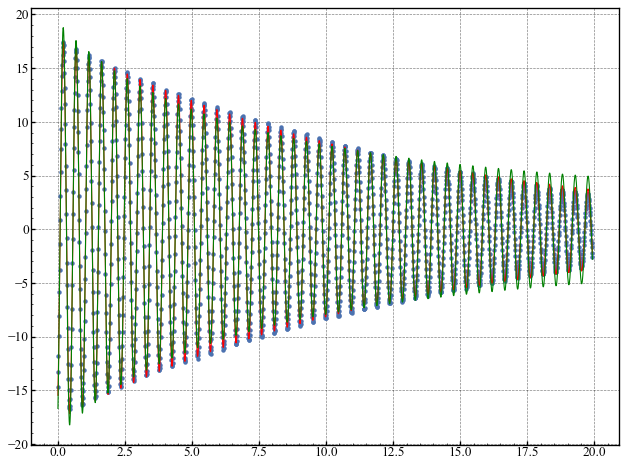

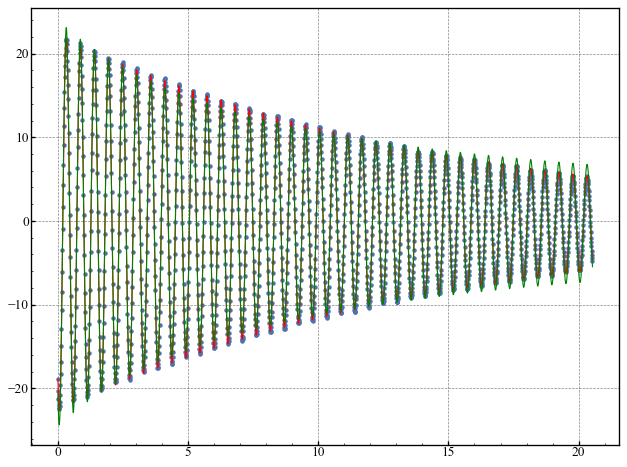

In [8]:
with open("Data/Oscillazioni pretensionata_rete_5e7masse.csv", "r") as file:
    df_pr = pd.read_csv(file, delimiter=";", decimal=",")

masse = [129.81, 169.38]  # Da excel

for i in range(2):
    fig, ax = plt.subplots()
    Y = df_pr.iloc[:, i].dropna()
    X = np.linspace(0.01, len(Y) / 100, len(Y))

    omega = np.sqrt(
        k_pretensionata
        / ((masse[i] + 29.91 / 3) / 1000)
        # 29.91/3 deriva dalla massa della molla
        # /1000 per convertire g in kg
    )
    scale_omega = 1

    params, std_dev = Fits.smorzato(X, Y)
    params2, std_dev2 = Fits.smorzato2(X, Y, omega * scale_omega)

    print(params)
    print(params2, omega * scale_omega)

    ax.scatter(X, Y)
    ax.plot(X, Fits.curve(X, *params), c="r")
    ax.plot(X, Fits.curve2(X, *params2, omega * scale_omega), c="g")

[24.38088341  0.04514584  5.82972118 -1.48767338 -0.30335797]
[ 2.68106717e+01  3.25780744e-03 -1.36609530e+00 -3.02419739e-01] 5.817137767352778
[31.17756916  0.09298998  7.58382708 -1.06269861 -0.10452689]
[ 3.51735249e+01  5.62015780e-03 -1.16885617e+00 -1.51169228e-01] 7.604937672192234


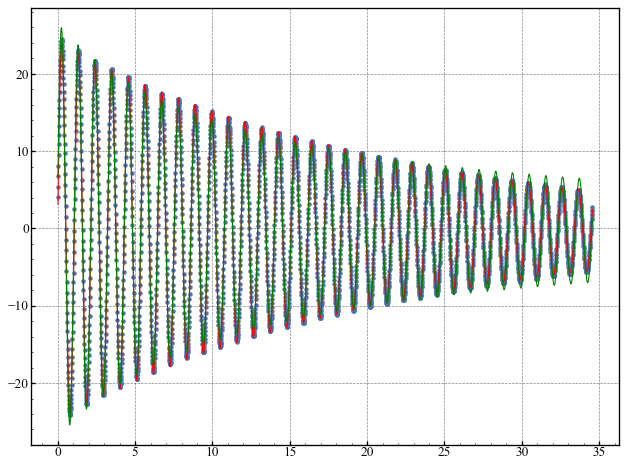

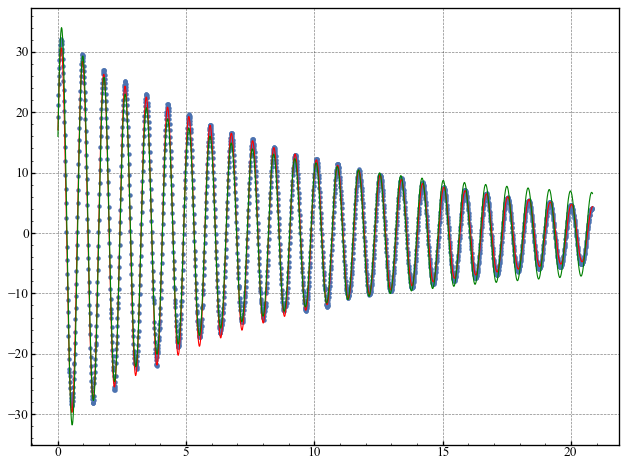

In [9]:
with open("Data/Oscillazioni non_pretensionata_rete_3e1masse.csv", "r") as file:
    df_nr = pd.read_csv(file, delimiter=";", decimal=",")

masse = [90.18, 50.63]  # Da excel

for i in range(2):
    fig, ax = plt.subplots()
    Y = df_nr.iloc[:, i].dropna()
    X = np.linspace(0.01, len(Y) / 100, len(Y))

    omega = np.sqrt(
        k_non_pretensionata
        / ((masse[i] + 15.43 / 3) / 1000)
        # 29.91/3 deriva dalla massa della molla
        # /1000 per convertire g in kg
    )
    scale_omega = 1

    params, std_dev = Fits.smorzato(X, Y)
    params2, std_dev2 = Fits.smorzato2(X, Y, omega * scale_omega)

    print(params)
    print(params2, omega * scale_omega)

    ax.scatter(X, Y)
    ax.plot(X, Fits.curve(X, *params), c="r")
    ax.plot(X, Fits.curve2(X, *params2, omega * scale_omega), c="g")

[-6.55508863e+01  4.69012544e-02  5.66226951e+00 -2.82023428e+00
 -7.21875256e-01]
[ 7.06913850e+01  1.22542891e-03  1.36435149e-01 -7.43872383e-01] 5.683370000291231
[32.55006227  0.07387974  7.25255031 -0.21638804 -0.21775454]
[ 3.56661217e+01  4.71815826e-03 -5.78610403e-01 -2.53251262e-01] 7.311900948987818


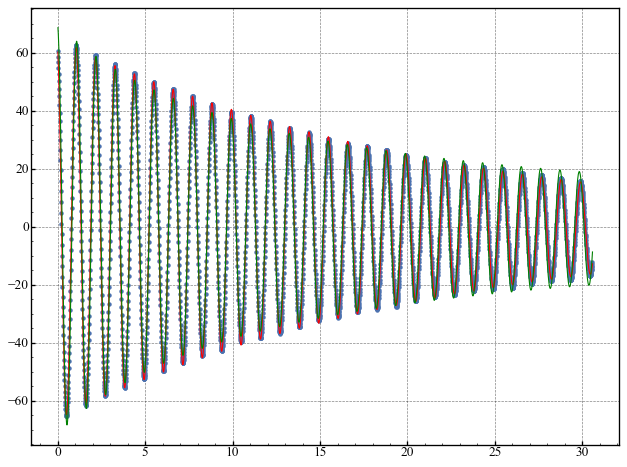

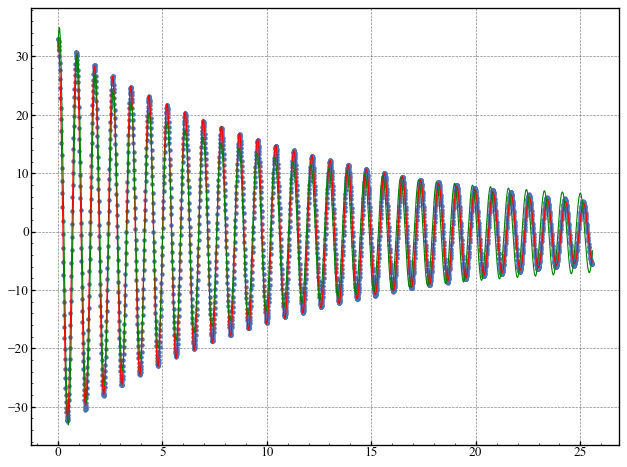

In [10]:
with open("Data/Oscillazioni non_pretensionata_cd_3e1masse.csv", "r") as file:
    df_nc = pd.read_csv(file, delimiter=";", decimal=",")

masse = [94.72, 55.19]  # Da excel

for i in range(2):
    fig, ax = plt.subplots()
    Y = df_nc.iloc[:, i].dropna()
    X = np.linspace(0.01, len(Y) / 100, len(Y))

    omega = np.sqrt(
        k_non_pretensionata
        / ((masse[i] + 15.43 / 3) / 1000)
        # 29.91/3 deriva dalla massa della molla
        # /1000 per convertire g in kg
    )
    scale_omega = 1

    params, std_dev = Fits.smorzato(X, Y)
    params2, std_dev2 = Fits.smorzato2(X, Y, omega * scale_omega)

    print(params)
    print(params2, omega * scale_omega)

    ax.scatter(X, Y)
    ax.plot(X, Fits.curve(X, *params), c="r")
    ax.plot(X, Fits.curve2(X, *params2, omega * scale_omega), c="g")